In [25]:
import torch
import random

In [41]:
# Define the original tensor
#original_tensor = torch.tensor([1, 2, 3])

# Define the size
class_num = 5
size = 3
batch_size = 5

label = torch.randint(0, class_num-1, (batch_size,))
original_tensor = torch.randint(0, 10, (batch_size, 3))

# Create a new tensor with each element repeated 'size' times
repeated_tensor = original_tensor.repeat_interleave(size).reshape(batch_size, size, -1)
print(label)
#print(repeated_tensor)
#repeated_tensor = repeated_tensor.reshape(class_num, size, 1)

label_idx = list(range(len(label)*size))
random.shuffle(label_idx)
#label_shuffle = torch.tensor(label[label_idx])
print(label_idx)



tensor([2, 2, 1, 3, 1])
[0, 8, 2, 13, 1, 4, 9, 5, 11, 3, 12, 10, 6, 14, 7]


In [44]:
import torch
import random
from itertools import groupby

# 元のテンソル
original_tensor = torch.tensor([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 2, 2, 2])

# テンソルをリストに変換
original_list = original_tensor.tolist()

# 同じ数字のセットをサブリストに分割し、そのインデックスも取得
grouped_values = []
grouped_indices = []
for value, group in groupby(enumerate(original_list), key=lambda x: x[1]):
    group = list(group)
    grouped_values.append([x[1] for x in group])  # 値
    grouped_indices.append([x[0] for x in group])  # インデックス

# 値のサブリストとインデックスを同じ順番でシャッフル
combined = list(zip(grouped_values, grouped_indices))
random.shuffle(combined)

# シャッフルされたサブリストを結合
shuffled_values = [item for group, _ in combined for item in group]
shuffled_indices = [idx for _, indices in combined for idx in indices]

# リストを再びテンソルに変換
shuffled_tensor = torch.tensor(shuffled_values)

print("もとのテンソル", original_tensor)
print("シャッフルされたテンソル:", shuffled_tensor)
print("シャッフルされたインデックス:", shuffled_indices)
    

もとのテンソル tensor([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 2, 2, 2])
シャッフルされたテンソル: tensor([4, 4, 4, 2, 2, 2, 5, 5, 5, 1, 1, 1, 2, 2, 2, 3, 3, 3])
シャッフルされたインデックス: [9, 10, 11, 15, 16, 17, 12, 13, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8]


In [3]:
import torch
from torch import nn
from torch.nn import functional as F

class GaussPertubation(nn.Module):
    def __init__(self, dim=768, aug_time=8):
        super().__init__()
        self.dim = dim
        self.mean = nn.Parameter(torch.zeros(dim))
        self.log_std = nn.Parameter(torch.zeros(dim))
        self.aug_time = aug_time

    def get_noise(self):
        gauss_dist = torch.distributions.Normal(self.mean, self.log_std.exp())
        e = gauss_dist.sample()
        return F.softplus(e)

    def augment(self, x):
        aug_x = []
        print(x.shape)
        for i in range(self.aug_time):
            noise = self.get_noise()
            aug_x.extend(x + noise)
        return torch.stack(aug_x)

    def forward(self, x):
        return self.augment(x)

pertubation = GaussPertubation()

x = torch.randn(1, 768) # batch_size, dim
pertubation(x).shape

x.mean()

torch.Size([1, 768])


tensor(-0.0040)

Text(0.5, 1.0, 'text entropy')

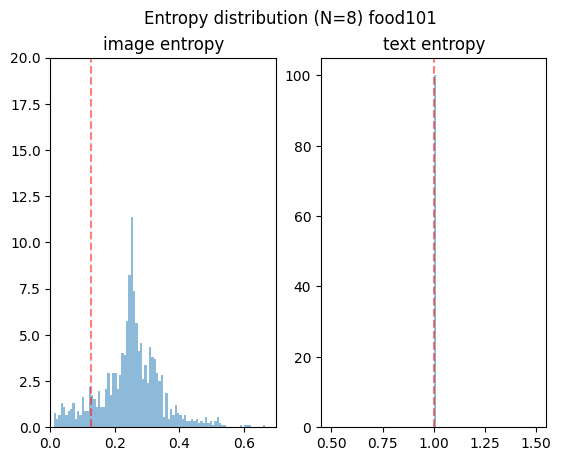

In [76]:
import pickle
import torch

dataset = "food101"
path = f"/home/yhiro/work/AWT/AWT_few_shot/MM_Adapter/output/{dataset}/AWT/vit_b16_1_2_4_shot_check_ent_1shots/seed3"
epoch_num = 20
aug_num_image = 8
aug_num_text = 1

image_weights = []
text_weights = []
for i in range(epoch_num):
    with open(f"{path}/image_weights_ep_{i}.pkl", "rb") as f:
        data = pickle.load(f)
        image_weights.extend(data.reshape(-1))
    with open(f"{path}/text_weights_ep_{i}.pkl", "rb") as f:
        data = pickle.load(f)
        text_weights.extend(data.reshape(-1))

# plot histogram
import matplotlib.pyplot as plt
import numpy as np

vline_image = 1.0 / aug_num_image
vline_text = 1.0 / aug_num_text

fig, ax = plt.subplots(1, 2)
ax = ax.ravel()
fig.suptitle(f"Entropy distribution (N={aug_num_image}) {dataset}")
ax[0].hist(image_weights, bins=100, alpha=0.5, label="image", density=True)
ax[0].axvline(vline_image, color='r', alpha=0.5, linestyle='--')
ax[0].set_title("image entropy")
ax[0].set_ylim(0, 20)
ax[0].set_xlim(0, 0.7)
ax[1].hist(text_weights, bins=100, alpha=0.5, label="text", density=True)
ax[1].axvline(vline_text, color='r', alpha=0.5, linestyle='--')
ax[1].set_title("text entropy")

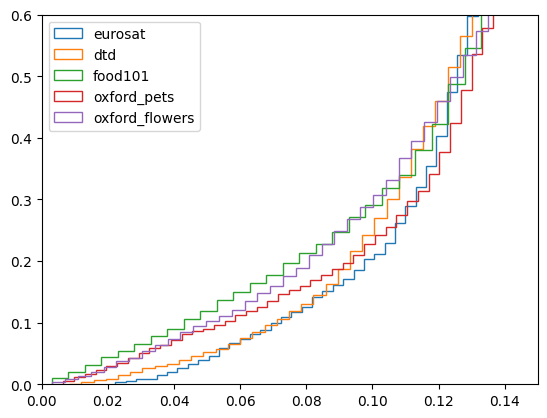

In [2]:
import pickle
import matplotlib.pyplot as plt

datasets = ["eurosat", "dtd", "food101", "oxford_pets", "oxford_flowers"]

for dataset in datasets:
    path = f"/home/yhiro/work/AWT/AWT_few_shot/MM_Adapter/output/{dataset}/AWT/vit_b16_1_2_4_shot_check_ent_1shots/seed1"
    epoch_num = 20
    aug_num_image = 8
    
    image_weights = []
    for i in range(epoch_num):
        with open(f"{path}/image_weights_ep_{i}.pkl", "rb") as f:
            data = pickle.load(f)
            image_weights.extend(data.reshape(-1))

    # plot cumulative distribution
    plt.hist(image_weights, bins=100, density=True, histtype="step", cumulative=True, label=dataset)
plt.xlim(0, 0.15)
plt.ylim(0, 0.6)
plt.legend()
plt.show()

/home/yhiro/miniconda3/envs/awt/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/yhiro/miniconda3/envs/awt/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


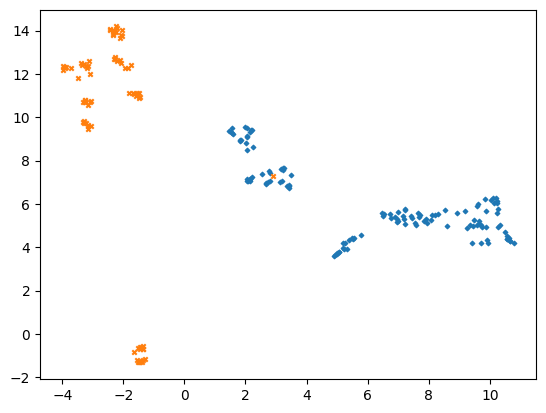

In [1]:
import pickle
import torch
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import numpy as np

dataset = "eurosat"
path = f"/home/yhiro/work/AWT/AWT_few_shot/MM_Adapter/output/{dataset}/AWT_RESAMPLE/vit_b16_1_2_4_shot_4shots/seed1"
epoch_num = 20
batch_size = 16
aug_time = 8
n_cls = 10
n_desc = 8
use_epochs = [19]

image_features = []
text_features = []
image_features_mod = []
text_features_mod = []
label = []

#for i in range(20,22):
for i in use_epochs:
    with open(f"{path}/img_feat_stu_{i}.pkl", "rb") as f:
        data = pickle.load(f)
        image_features.extend(data)
    with open(f"{path}/text_feat_stu_{i}.pkl", "rb") as f:
        data = pickle.load(f)
        text_features.extend(data)
    with open(f"{path}/img_feat_mod_{i}.pkl", "rb") as f:
        data = pickle.load(f)
        image_features_mod.extend(data)
    with open(f"{path}/text_feat_mod_{i}.pkl", "rb") as f:
        data = pickle.load(f)
        text_features_mod.extend(data)
    with open(f"{path}/label_{i}.pkl", "rb") as f:
        data = pickle.load(f)
        label.extend(data)

# concat all numpy features
all_features = np.concatenate([image_features_mod, text_features_mod], axis=0)
all_labels_image = np.array(label).reshape(len(use_epochs), batch_size).repeat(aug_time, axis=1)
all_labels_text = np.arange(n_cls).repeat(n_desc).reshape(-1,n_cls*n_desc).repeat(len(use_epochs),axis=0)

# t-SNE
#reducer = TSNE(n_components=2, random_state=0)
reducer = umap.UMAP(n_components=2, random_state=0)

all_features_tsne = reducer.fit_transform(all_features)

image_features_mod_tsne = all_features_tsne[:len(image_features_mod)]
text_features_mod_tsne = all_features_tsne[len(image_features_mod):]

fig, ax = plt.subplots()

image_features_mod_tsne = image_features_mod_tsne.reshape(len(use_epochs), -1, 2)
text_features_mod_tsne = text_features_mod_tsne.reshape(len(use_epochs), -1, 2)

cmap = plt.get_cmap("tab10")
i = 0
for imf, txf in zip(image_features_mod_tsne, text_features_mod_tsne):
    ax.scatter(imf[:, 0], imf[:, 1], s=5, marker="D", color=cmap(i), label=f"epoch{i}")
    ax.scatter(txf[:, 0], txf[:, 1], s=10, marker="x", color=cmap(i+1), label=f"epoch{i}")
    i += 1
#plt.legend()

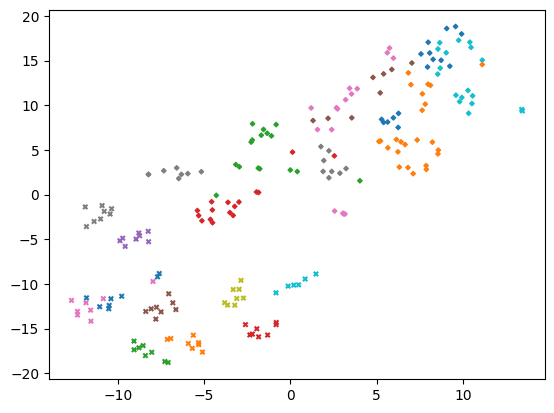

In [6]:
import pickle
import torch
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import numpy as np

dataset = "eurosat"
path = f"/home/yhiro/work/AWT/AWT_few_shot/MM_Adapter/output/{dataset}/AWT_RESAMPLE/vit_b16_1_2_4_shot_4shots/seed1"
epoch_num = 20
batch_size = 16
aug_time = 8
n_cls = 10
n_desc = 8
use_epochs = [20]

image_features = []
text_features = []
image_features_mod = []
text_features_mod = []
label = []

for i in use_epochs:
    with open(f"{path}/img_feat_stu_{i}.pkl", "rb") as f:
        data = pickle.load(f)
        image_features.extend(data)
    with open(f"{path}/text_feat_stu_{i}.pkl", "rb") as f:
        data = pickle.load(f)
        text_features.extend(data)
    with open(f"{path}/img_feat_mod_{i}.pkl", "rb") as f:
        data = pickle.load(f)
        image_features_mod.extend(data)
    with open(f"{path}/text_feat_mod_{i}.pkl", "rb") as f:
        data = pickle.load(f)
        text_features_mod.extend(data)
    with open(f"{path}/label_{i}.pkl", "rb") as f:
        data = pickle.load(f)
        label.extend(data)

# concat all numpy features
all_features = np.concatenate([image_features_mod, text_features_mod], axis=0)
all_labels_image = np.array(label).reshape(len(use_epochs), batch_size).repeat(aug_time, axis=1)
all_labels_text = np.arange(n_cls).repeat(n_desc).reshape(-1,n_cls*n_desc).repeat(len(use_epochs),axis=0)

# t-SNE
reducer = TSNE(n_components=2, random_state=0)

all_features_tsne = reducer.fit_transform(all_features)

image_features_mod_tsne = all_features_tsne[:len(image_features_mod)]
text_features_mod_tsne = all_features_tsne[len(image_features_mod):]

fig, ax = plt.subplots()

image_features_mod_tsne = image_features_mod_tsne.reshape(len(use_epochs), -1, 2)
text_features_mod_tsne = text_features_mod_tsne.reshape(len(use_epochs), -1, 2)

cmap = plt.get_cmap("tab10")
i = 0
for imf, txf in zip(image_features_mod_tsne, text_features_mod_tsne):
    # ax.scatter(imf[:, 0], imf[:, 1], s=5, marker="D", color=cmap(i), label=f"epoch{i}")
    # ax.scatter(txf[:, 0], txf[:, 1], s=10, marker="x", color=cmap(i), label=f"epoch{i}")
    ax.scatter(imf[:, 0], imf[:, 1], s=5, marker="D", c=all_labels_image[i], label=f"epoch{i}", cmap="tab10")
    ax.scatter(txf[:, 0], txf[:, 1], s=10, marker="x", c=all_labels_text[i], label=f"epoch{i}", cmap="tab10")
    i += 1
#plt.legend()

In [67]:
epochs = 2
aug_time = 2
n_desc = 2
print(np.array(label).reshape(2,16).repeat(2, axis=1))

print(np.arange(10).repeat(n_desc).reshape(-1,10*n_desc).repeat(epochs, axis=0))

[[5 5 4 4 7 7 4 4 2 2 0 0 7 7 8 8 3 3 5 5 9 9 9 9 4 4 0 0 8 8 1 1]
 [5 5 3 3 4 4 1 1 2 2 6 6 6 6 4 4 9 9 2 2 8 8 9 9 4 4 2 2 0 0 7 7]]
[[0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9]
 [0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9]]


In [7]:
def test():
    return 1,2

test()

(1, 2)

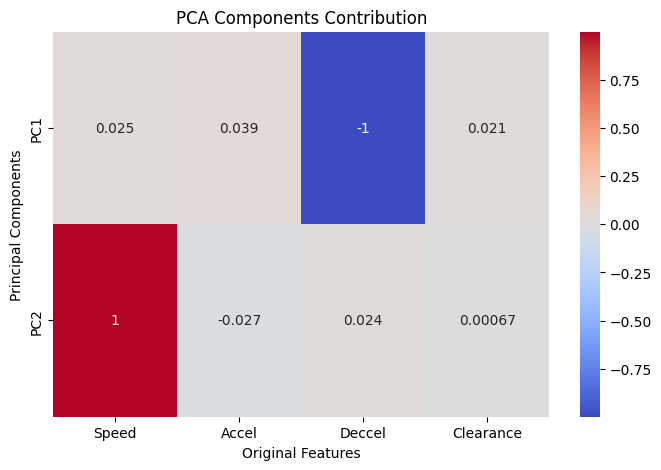

In [14]:
from sklearn.decomposition import PCA

# PCA適用
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 主成分ごとの寄与度
pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])

# PCAの寄与度をプロット
plt.figure(figsize=(8, 5))
sns.heatmap(pca_components, annot=True, cmap="coolwarm", cbar=True)
plt.title("PCA Components Contribution")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.show()


In [2]:
!pip install seaborn